#Scikit-LLM Fundamentals (NLP Tasks)

In [1]:
!pip install scikit-llm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.3 MB/s eta 0:00:00


#Text classification



##Zero-shot text classification


In [2]:
from skllm.config import SKLLMConfig
from google.colab import userdata

SKLLMConfig.set_openai_key(userdata.get('OPENAI_API_KEY'))

In [3]:
from skllm.models.gpt.classification.zero_shot import ZeroShotGPTClassifier
from skllm.datasets import get_classification_dataset

X, _ = get_classification_dataset()

clf = ZeroShotGPTClassifier()
clf.fit(None, ["positive", "negative", "neutral"])
labels = clf.predict(X)

100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


In [5]:
X

["I was absolutely blown away by the performances in 'Summer's End'. The acting was top-notch, and the plot had me gripped from start to finish. A truly captivating cinematic experience that I would highly recommend.",
 "The special effects in 'Star Battles: Nebula Conflict' were out of this world. I felt like I was actually in space. The storyline was incredibly engaging and left me wanting more. Excellent film.",
 "'The Lost Symphony' was a masterclass in character development and storytelling. The score was hauntingly beautiful and complimented the intense, emotional scenes perfectly. Kudos to the director and cast for creating such a masterpiece.",
 "I was pleasantly surprised by 'Love in the Time of Cholera'. The romantic storyline was heartwarming and the characters were incredibly realistic. The cinematography was also top-notch. A must-watch for all romance lovers.",
 "I went into 'Marble Street' with low expectations, but I was pleasantly surprised. The suspense was well-maint

In [4]:
labels

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'negative', 'negative', 'neutral', 'neutral'], dtype='<U8')

In [6]:
from skllm.models.gpt.classification.zero_shot import MultiLabelZeroShotGPTClassifier
from skllm.datasets import get_multilabel_classification_dataset

X, _ = get_multilabel_classification_dataset()
candidate_labels = [
    "Quality",
    "Price",
    "Delivery",
    "Service",
    "Product Variety",
    "Customer Support",
    "Packaging",
    "User Experience",
    "Return Policy",
    "Product Information",
]
clf = MultiLabelZeroShotGPTClassifier(max_labels=3)
clf.fit(None, [candidate_labels])
labels = clf.predict(X)

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


In [7]:
X

['The product was of excellent quality, and the packaging was also very good. Highly recommend!',
 'The delivery was super fast, but the product did not match the information provided on the website.',
 'Great variety of products, but the customer support was quite unresponsive.',
 'Affordable prices and an easy-to-use website. A great shopping experience overall.',
 'The delivery was delayed, and the packaging was damaged. Not a good experience.',
 'Excellent customer support, but the return policy is quite complicated.',
 'The product was not as described. However, the return process was easy and quick.',
 'Great service and fast delivery. The product was also of high quality.',
 'The prices are a bit high. However, the product quality and user experience are worth it.',
 'The website provides detailed information about products. The delivery was also very fast.']

In [8]:
labels

array([['Quality', 'Packaging', ''],
       ['Delivery', 'Product Information', ''],
       ['Product Variety', 'Customer Support', ''],
       ['Price', 'User Experience', ''],
       ['Delivery', 'Packaging', 'User Experience'],
       ['Customer Support', 'Return Policy', ''],
       ['Return Policy', 'Quality', ''],
       ['Service', 'Quality', 'Delivery'],
       ['Quality', 'Price', 'User Experience'],
       ['Product Information', 'Delivery', '']], dtype='<U19')

##Few-shot text classification


In [9]:
from skllm.models.gpt.classification.few_shot import (
FewShotGPTClassifier,
MultiLabelFewShotGPTClassifier,
)
from skllm.datasets import (
    get_classification_dataset,
    get_multilabel_classification_dataset,
)

# single label
X, y = get_classification_dataset()
clf = FewShotGPTClassifier(model="gpt-4o")
clf.fit(X,y)
labels = clf.predict(X)

100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


In [10]:
X

["I was absolutely blown away by the performances in 'Summer's End'. The acting was top-notch, and the plot had me gripped from start to finish. A truly captivating cinematic experience that I would highly recommend.",
 "The special effects in 'Star Battles: Nebula Conflict' were out of this world. I felt like I was actually in space. The storyline was incredibly engaging and left me wanting more. Excellent film.",
 "'The Lost Symphony' was a masterclass in character development and storytelling. The score was hauntingly beautiful and complimented the intense, emotional scenes perfectly. Kudos to the director and cast for creating such a masterpiece.",
 "I was pleasantly surprised by 'Love in the Time of Cholera'. The romantic storyline was heartwarming and the characters were incredibly realistic. The cinematography was also top-notch. A must-watch for all romance lovers.",
 "I went into 'Marble Street' with low expectations, but I was pleasantly surprised. The suspense was well-maint

In [11]:
y

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [12]:
X, y = get_multilabel_classification_dataset()
clf = MultiLabelFewShotGPTClassifier(max_labels=3, model="gpt-4o-mini")
clf.fit(X,y)
labels = clf.predict(X)

100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


In [13]:
X

['The product was of excellent quality, and the packaging was also very good. Highly recommend!',
 'The delivery was super fast, but the product did not match the information provided on the website.',
 'Great variety of products, but the customer support was quite unresponsive.',
 'Affordable prices and an easy-to-use website. A great shopping experience overall.',
 'The delivery was delayed, and the packaging was damaged. Not a good experience.',
 'Excellent customer support, but the return policy is quite complicated.',
 'The product was not as described. However, the return process was easy and quick.',
 'Great service and fast delivery. The product was also of high quality.',
 'The prices are a bit high. However, the product quality and user experience are worth it.',
 'The website provides detailed information about products. The delivery was also very fast.']

In [14]:
y

[['Quality', 'Packaging'],
 ['Delivery', 'Product Information'],
 ['Product Variety', 'Customer Support'],
 ['Price', 'User Experience'],
 ['Delivery', 'Packaging'],
 ['Customer Support', 'Return Policy'],
 ['Product Information', 'Return Policy'],
 ['Service', 'Delivery', 'Quality'],
 ['Price', 'Quality', 'User Experience'],
 ['Product Information', 'Delivery']]

##Dynamic few-shot text classification


In [15]:
X = [
    "I love reading science fiction novels, they transport me to other worlds.", # example 1 - book - sci-fi
    "A good mystery novel keeps me guessing until the very end.", # example 2 - book - mystery
    "Historical novels give me a sense of different times and places.", # example 3 - book - historical
    "I love watching science fiction movies, they transport me to other galaxies.", # example 4 - movie - sci-fi
    "A good mystery movie keeps me on the edge of my seat.", # example 5 - movie - mystery
    "Historical movies offer a glimpse into the past.", # example 6 - movie - historical
]

y = ["books", "books", "books", "movies", "movies", "movies"]

In [16]:
from skllm.models.gpt.classification.few_shot import DynamicFewShotGPTClassifier

query = "I have fallen deeply in love with this sci-fi book; its unique blend of science and fiction has me spellbound."

clf = DynamicFewShotGPTClassifier(n_examples=1, model="gpt-4o-mini").fit(X,y)

prompt = clf._get_prompt(query)
print(prompt)

Building index for class `books` ...
Batch size: 1


100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Building index for class `movies` ...
Batch size: 1


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


Batch size: 1


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

{'messages': "\nYou will be provided with the following information:\n1. An arbitrary text sample. The sample is delimited with triple backticks.\n2. List of categories the text sample can be assigned to. The list is delimited with square brackets. The categories in the list are enclosed in the single quotes and comma separated.\n3. Examples of text samples and their assigned categories. The examples are delimited with triple backticks. The assigned categories are enclosed in a list-like structure. These examples are to be used as training data.\n\nPerform the following tasks:\n1. Identify to which category the provided text belongs to with the highest probability.\n2. Assign the provided text to that category.\n3. Provide your response in a JSON format containing a single key `label` and a value corresponding to the assigned category. Do not provide any additional information except the JSON.\n\nList of categories: ['books', 'movies']\n\nTraining data:\n\nSample input:\n```I love read

In [17]:
print(prompt)

{'messages': "\nYou will be provided with the following information:\n1. An arbitrary text sample. The sample is delimited with triple backticks.\n2. List of categories the text sample can be assigned to. The list is delimited with square brackets. The categories in the list are enclosed in the single quotes and comma separated.\n3. Examples of text samples and their assigned categories. The examples are delimited with triple backticks. The assigned categories are enclosed in a list-like structure. These examples are to be used as training data.\n\nPerform the following tasks:\n1. Identify to which category the provided text belongs to with the highest probability.\n2. Assign the provided text to that category.\n3. Provide your response in a JSON format containing a single key `label` and a value corresponding to the assigned category. Do not provide any additional information except the JSON.\n\nList of categories: ['books', 'movies']\n\nTraining data:\n\nSample input:\n```I love read

In [18]:
labels = clf.predict(query)

  0%|          | 0/110 [00:00<?, ?it/s]

Batch size: 1



  1%|          | 1/110 [00:01<03:18,  1.82s/it]

Batch size: 1



  2%|▏         | 2/110 [00:03<02:44,  1.52s/it]

Batch size: 1



  3%|▎         | 3/110 [00:04<02:26,  1.37s/it]

Batch size: 1



  4%|▎         | 4/110 [00:05<02:17,  1.29s/it]

Batch size: 1



  5%|▍         | 5/110 [00:06<02:17,  1.31s/it]

Batch size: 1



  5%|▌         | 6/110 [00:08<02:23,  1.38s/it]

Batch size: 1



  6%|▋         | 7/110 [00:10<02:33,  1.49s/it]

Batch size: 1



  7%|▋         | 8/110 [00:11<02:35,  1.52s/it]

Batch size: 1



  8%|▊         | 9/110 [00:12<02:21,  1.40s/it]

Batch size: 1



  9%|▉         | 10/110 [00:14<02:18,  1.39s/it]

Batch size: 1



 10%|█         | 11/110 [00:15<02:13,  1.35s/it]

Batch size: 1



 11%|█         | 12/110 [00:16<02:08,  1.31s/it]

Batch size: 1



 12%|█▏        | 13/110 [00:18<02:13,  1.38s/it]

Batch size: 1



 13%|█▎        | 14/110 [00:19<02:05,  1.31s/it]

Batch size: 1



 14%|█▎        | 15/110 [00:20<02:11,  1.39s/it]

Batch size: 1



 15%|█▍        | 16/110 [00:22<02:04,  1.33s/it]

Batch size: 1



 15%|█▌        | 17/110 [00:23<02:19,  1.50s/it]

Batch size: 1



 16%|█▋        | 18/110 [00:25<02:13,  1.45s/it]

Batch size: 1



 17%|█▋        | 19/110 [00:26<02:09,  1.42s/it]

Batch size: 1



 18%|█▊        | 20/110 [00:27<02:01,  1.35s/it]

Batch size: 1



 19%|█▉        | 21/110 [00:29<01:59,  1.34s/it]

Batch size: 1



 20%|██        | 22/110 [00:30<01:54,  1.30s/it]

Batch size: 1



 21%|██        | 23/110 [00:31<01:52,  1.29s/it]

Batch size: 1



 22%|██▏       | 24/110 [00:32<01:50,  1.29s/it]

Batch size: 1



 23%|██▎       | 25/110 [00:34<01:50,  1.30s/it]

Batch size: 1



 24%|██▎       | 26/110 [00:35<01:45,  1.26s/it]

Batch size: 1



 25%|██▍       | 27/110 [00:36<01:41,  1.23s/it]

Batch size: 1



 25%|██▌       | 28/110 [00:38<01:49,  1.34s/it]

Batch size: 1



 26%|██▋       | 29/110 [00:39<01:44,  1.29s/it]

Batch size: 1



 27%|██▋       | 30/110 [00:40<01:46,  1.33s/it]

Batch size: 1



 28%|██▊       | 31/110 [00:41<01:41,  1.29s/it]

Batch size: 1



 29%|██▉       | 32/110 [00:43<01:48,  1.40s/it]

Batch size: 1



 30%|███       | 33/110 [00:45<01:55,  1.50s/it]

Batch size: 1



 31%|███       | 34/110 [00:46<01:51,  1.47s/it]

Batch size: 1



 32%|███▏      | 35/110 [00:47<01:43,  1.38s/it]

Batch size: 1



 33%|███▎      | 36/110 [00:49<01:38,  1.33s/it]

Batch size: 1



 34%|███▎      | 37/110 [00:50<01:37,  1.34s/it]

Batch size: 1



 35%|███▍      | 38/110 [00:51<01:32,  1.29s/it]

Batch size: 1



 35%|███▌      | 39/110 [00:52<01:27,  1.23s/it]

Batch size: 1



 36%|███▋      | 40/110 [00:53<01:26,  1.23s/it]

Batch size: 1



 37%|███▋      | 41/110 [00:55<01:39,  1.44s/it]

Batch size: 1



 38%|███▊      | 42/110 [00:57<01:47,  1.58s/it]

Batch size: 1



 39%|███▉      | 43/110 [00:59<01:40,  1.50s/it]

Batch size: 1



 40%|████      | 44/110 [01:01<01:49,  1.66s/it]

Batch size: 1



 41%|████      | 45/110 [01:02<01:39,  1.53s/it]

Batch size: 1



 42%|████▏     | 46/110 [01:03<01:31,  1.43s/it]

Batch size: 1



 43%|████▎     | 47/110 [01:04<01:19,  1.26s/it]

Batch size: 1



 44%|████▎     | 48/110 [01:05<01:17,  1.25s/it]

Batch size: 1



 45%|████▍     | 49/110 [01:06<01:07,  1.11s/it]

Batch size: 1



 45%|████▌     | 50/110 [01:07<01:08,  1.15s/it]

Batch size: 1



 46%|████▋     | 51/110 [01:08<01:09,  1.18s/it]

Batch size: 1



 47%|████▋     | 52/110 [01:10<01:22,  1.43s/it]

Batch size: 1



 48%|████▊     | 53/110 [01:12<01:31,  1.61s/it]

Batch size: 1



 49%|████▉     | 54/110 [01:14<01:28,  1.57s/it]

Batch size: 1



 50%|█████     | 55/110 [01:15<01:18,  1.43s/it]

Batch size: 1



 51%|█████     | 56/110 [01:16<01:15,  1.40s/it]

Batch size: 1



 52%|█████▏    | 57/110 [01:18<01:20,  1.52s/it]

Batch size: 1



 53%|█████▎    | 58/110 [01:19<01:09,  1.34s/it]

Batch size: 1



 54%|█████▎    | 59/110 [01:20<01:05,  1.28s/it]

Batch size: 1



 55%|█████▍    | 60/110 [01:21<00:58,  1.17s/it]

Batch size: 1



 55%|█████▌    | 61/110 [01:23<01:01,  1.25s/it]

Batch size: 1



 56%|█████▋    | 62/110 [01:24<00:58,  1.22s/it]

Batch size: 1



 57%|█████▋    | 63/110 [01:25<00:51,  1.10s/it]

Batch size: 1



 58%|█████▊    | 64/110 [01:26<00:57,  1.25s/it]

Batch size: 1



 59%|█████▉    | 65/110 [01:27<00:54,  1.20s/it]

Batch size: 1



 60%|██████    | 66/110 [01:29<00:57,  1.31s/it]

Batch size: 1



 61%|██████    | 67/110 [01:30<00:51,  1.21s/it]

Batch size: 1



 62%|██████▏   | 68/110 [01:31<00:50,  1.20s/it]

Batch size: 1



 63%|██████▎   | 69/110 [01:32<00:49,  1.20s/it]

Batch size: 1



 64%|██████▎   | 70/110 [01:34<00:51,  1.30s/it]

Batch size: 1



 65%|██████▍   | 71/110 [01:35<00:55,  1.42s/it]

Batch size: 1



 65%|██████▌   | 72/110 [01:37<01:00,  1.60s/it]

Batch size: 1



 66%|██████▋   | 73/110 [01:39<00:55,  1.50s/it]

Batch size: 1



 67%|██████▋   | 74/110 [01:40<00:51,  1.44s/it]

Batch size: 1



 68%|██████▊   | 75/110 [01:41<00:48,  1.38s/it]

Batch size: 1



 69%|██████▉   | 76/110 [01:43<00:50,  1.49s/it]

Batch size: 1



 70%|███████   | 77/110 [01:45<00:49,  1.51s/it]

Batch size: 1



 71%|███████   | 78/110 [01:47<00:55,  1.72s/it]

Batch size: 1



 72%|███████▏  | 79/110 [01:49<00:54,  1.77s/it]

Batch size: 1



 73%|███████▎  | 80/110 [01:50<00:50,  1.68s/it]

Batch size: 1



 74%|███████▎  | 81/110 [01:52<00:47,  1.63s/it]

Batch size: 1



 75%|███████▍  | 82/110 [01:53<00:42,  1.53s/it]

Batch size: 1



 75%|███████▌  | 83/110 [01:54<00:37,  1.40s/it]

Batch size: 1



 76%|███████▋  | 84/110 [01:55<00:35,  1.35s/it]

Batch size: 1



 77%|███████▋  | 85/110 [01:57<00:34,  1.40s/it]

Batch size: 1



 78%|███████▊  | 86/110 [01:58<00:33,  1.38s/it]

Batch size: 1



 79%|███████▉  | 87/110 [02:00<00:33,  1.47s/it]

Batch size: 1



 80%|████████  | 88/110 [02:01<00:30,  1.38s/it]

Batch size: 1



 81%|████████  | 89/110 [02:02<00:28,  1.36s/it]

Batch size: 1



 82%|████████▏ | 90/110 [02:04<00:26,  1.35s/it]

Batch size: 1



 83%|████████▎ | 91/110 [02:05<00:24,  1.28s/it]

Batch size: 1



 84%|████████▎ | 92/110 [02:06<00:22,  1.25s/it]

Batch size: 1



 85%|████████▍ | 93/110 [02:07<00:20,  1.21s/it]

Batch size: 1



 85%|████████▌ | 94/110 [02:08<00:18,  1.18s/it]

Batch size: 1



 86%|████████▋ | 95/110 [02:10<00:20,  1.39s/it]

Batch size: 1



 87%|████████▋ | 96/110 [02:11<00:19,  1.38s/it]

Batch size: 1



 88%|████████▊ | 97/110 [02:13<00:17,  1.32s/it]

Batch size: 1



 89%|████████▉ | 98/110 [02:14<00:16,  1.39s/it]

Batch size: 1



 90%|█████████ | 99/110 [02:15<00:14,  1.35s/it]

Batch size: 1



 91%|█████████ | 100/110 [02:17<00:13,  1.34s/it]

Batch size: 1



 92%|█████████▏| 101/110 [02:18<00:13,  1.47s/it]

Batch size: 1



 93%|█████████▎| 102/110 [02:20<00:11,  1.45s/it]

Batch size: 1



 94%|█████████▎| 103/110 [02:22<00:10,  1.52s/it]

Batch size: 1



 95%|█████████▍| 104/110 [02:23<00:08,  1.45s/it]

Batch size: 1



 95%|█████████▌| 105/110 [02:24<00:06,  1.37s/it]

Batch size: 1



 96%|█████████▋| 106/110 [02:25<00:05,  1.27s/it]

Batch size: 1



 97%|█████████▋| 107/110 [02:26<00:03,  1.20s/it]

Batch size: 1



 98%|█████████▊| 108/110 [02:27<00:02,  1.20s/it]

Batch size: 1



 99%|█████████▉| 109/110 [02:28<00:01,  1.20s/it]

Batch size: 1



100%|██████████| 110/110 [02:30<00:00,  1.37s/it]


In [19]:
labels

array(['books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'books', 'books',
       'books', 'books', 'books', 'books', 'books', 'movies', 'books',
       'books', 'bo

##Chain-of-thought text classification


In [20]:
from skllm.models.gpt.classification.zero_shot import CoTGPTClassifier
from skllm.datasets import get_classification_dataset

X, y = get_classification_dataset()

clf = CoTGPTClassifier(model="gpt-4o-mini")
clf.fit(X,y)
predictions = clf.predict(X)
labels, reasoning = predictions[:, 0], predictions[:, 1]

100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


In [21]:
labels

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'neutral', 'neutral', 'neutral',
       'negative', 'negative', 'negative', 'neutral', 'neutral'],
      dtype='<U1023')

In [22]:
reasoning

array(['{"\'positive\'": "The text expresses strong positive sentiments about the performances, acting, and plot of \'Summer\'s End\'. Phrases like \'absolutely blown away\', \'top-notch\', \'gripped from start to finish\', and \'truly captivating cinematic experience\' indicate a high level of satisfaction and enthusiasm, which aligns well with the \'positive\' category.", "\'negative\'": \'There are no indications of negative sentiments in the text. The language used is overwhelmingly positive, and there are no criticisms or complaints about the film. Therefore, this category does not apply.\', "\'neutral\'": \'The text does not present a neutral stance; it is clearly biased towards a positive opinion of the film. Neutrality would imply a lack of strong opinion or mixed feelings, which is not the case here.\'}',
       '{"\'positive\'": "The text expresses strong positive sentiments about the film \'Star Battles: Nebula Conflict\'. Phrases like \'out of this world\', \'incredibly eng

##Tunable text classification


In [ ]:
from skllm.models.gpt.classification.tunable import GPTClassifier

X, y = get_classification_dataset(model="gpt-4o-mini")
clf = GPTClassifier(n_epochs=1)
clf.fit(X,y)
clf.predict(X)

In [ ]:
from skllm.models.gpt.classification.tunable import MultiLabelGPTClassifier

#Text-to-text modelling

##Text summarization


In [25]:
from skllm.models.gpt.text2text.summarization import GPTSummarizer
from skllm.datasets import get_summarization_dataset

X = get_summarization_dataset()
summarizer = GPTSummarizer(model="gpt-4o-mini", max_words=15, focus="technology")
X_summarized = summarizer.fit_transform(X)

100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


In [26]:
X_summarized

array(['OpenAI launched GPT-4, a powerful language model for complex AI tasks.',
       'John prepared a fruit salad for his guests.',
       'The first Mars rover, Sojourner, greatly advanced our understanding of Mars.',
       'Regular exercise improves memory and cognitive function in older adults.',
       'The Eiffel Tower symbolizes French architectural innovation and is a beloved landmark.',
       "Microsoft's new Windows update enhances security and user interface for better experience.",
       'WHO declares a public health emergency due to a new virus outbreak.',
       'The 2024 Olympics will be held in Paris, marking its third hosting.',
       'Apple introduces a new iPhone with enhanced features.',
       'Scientists discovered a new bird species in the Amazon rainforest.'],
      dtype=object)

##Text translation


In [27]:
from skllm.models.gpt.text2text.translation import GPTTranslator
from skllm.datasets import get_translation_dataset

X = get_translation_dataset()
t = GPTTranslator(model="gpt-4o-mini", output_language="Español")
translated_text = t.fit_transform(X)

100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


In [28]:
translated_text

array(['Me encanta bailar salsa y bachata. Es una forma divertida de expresarme.',
       'Pasé mis últimas vacaciones en Grecia. Las playas eran magníficas.',
       'Ayer leí un gran libro. La historia fue cautivadora hasta el final.',
       'Me gusta cocinar platos tradicionales italianos. El espagueti a la carbonara es uno de mis favoritos.',
       'Tengo planes de hacer un viaje a Italia este verano. Espero visitar Roma y Venecia.',
       'Mi pasatiempo favorito es la fotografía. Me encanta capturar momentos hermosos.'],
      dtype=object)

##Tunable text-to-text


In [ ]:
from skllm.models.gpt.text2text.tunable import TunableGPTText2Text

model = TunableGPTText2Text(
        base_model = "gpt-3.5-turbo-0613",
        n_epochs = None, # int or None. When None, will be determined automatically by OpenAI
        system_msg = "You are a text processing model."
)

model.fit(X_train, y_train) # y_train is any desired output text
out = model.transform(X_test)

#Text Vectorization

In [31]:
from skllm.models.gpt.vectorization import GPTVectorizer

vectorizer = GPTVectorizer(batch_size=2, model="text-embedding-3-small")
X = vectorizer.fit_transform(["This is a text", "This is another text"])

Batch size: 2


100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


In [32]:
X

array([[ 0.00182703,  0.05156781,  0.00273551, ...,  0.0028463 ,
        -0.01510776, -0.00715503],
       [ 0.01440175,  0.02009511, -0.01509752, ...,  0.01012985,
        -0.00012192, -0.00133918]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

steps = [("GPT", GPTVectorizer()), ("Clf", XGBClassifier())]
clf = Pipeline(steps)
clf.fit(X_train, y_train_encoded)
yh = clf.predict(X_test)

#Tagging

## Named Entity Recognition


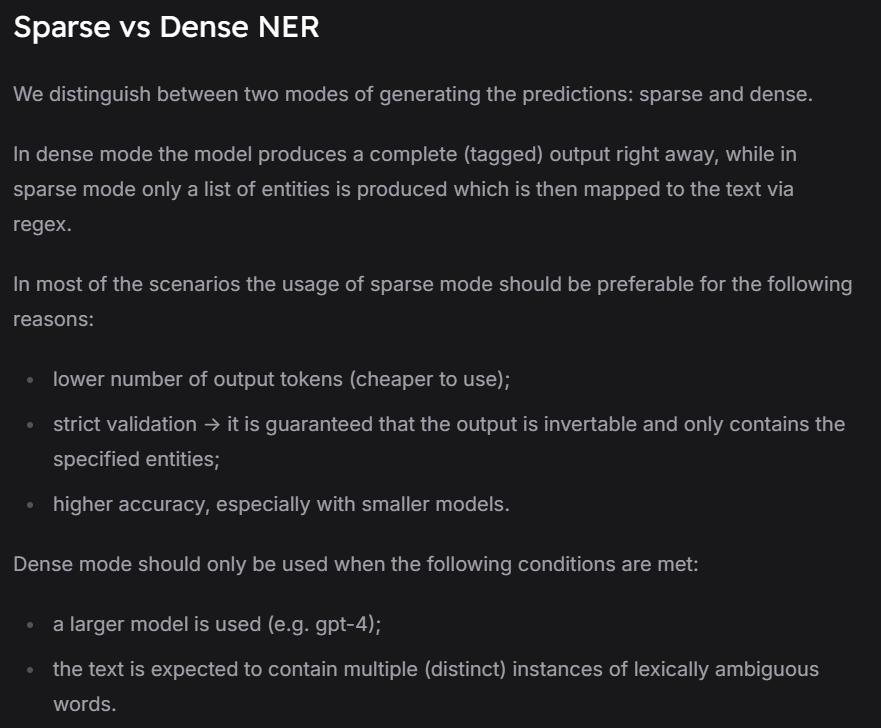

In [34]:
from skllm.models.gpt.tagging.ner import GPTExplainableNER as NER

entities = {
  "PERSON": "A name of an individual.",
  "ORGANIZATION": "A name of a company.",
  "DATE": "A specific time reference."
}

data = [
  "Tim Cook announced new Apple products in San Francisco on June 3, 2022.",
  "Elon Musk visited the Tesla factory in Austin on January 10, 2021.",
  "Mark Zuckerberg introduced Facebook Metaverse in Silicon Valley on May 5, 2023."
]

ner = NER(entities=entities, display_predictions=True)
tagged = ner.fit_transform(data)

100%|██████████| 3/3 [00:08<00:00,  2.74s/it]

Displaying predictions...


In [35]:
tagged

['<not_entity></not_entity><entity><reasoning>Tim Cook is a well-known individual, specifically the CEO of Apple, which makes it a name of an individual.</reasoning><tag>PERSON</tag><value>Tim Cook</value></entity><not_entity> announced new </not_entity><entity><reasoning>Apple is a well-known company, specifically a technology company, which makes it a name of a company.</reasoning><tag>ORGANIZATION</tag><value>Apple</value></entity><not_entity> products in San Francisco on </not_entity><entity><reasoning>June 3, 2022 is a specific date, which makes it a specific time reference.</reasoning><tag>DATE</tag><value>June 3, 2022</value></entity><not_entity>.</not_entity>',
 '<not_entity></not_entity><entity><reasoning>Elon Musk is a well-known individual, recognized as the CEO of Tesla and SpaceX.</reasoning><tag>PERSON</tag><value>Elon Musk</value></entity><not_entity> visited the </not_entity><entity><reasoning>Tesla is a well-known company that manufactures electric vehicles and energy 